# Challenge
Aldo Escobedo

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Business understanding

In [2]:
# Read datasets
general_info = pd.read_csv("datasets\general_info.csv")
internal_payments = pd.read_csv("datasets\internal_payments.csv")
credit_reports = pd.read_csv("datasets\credit_reports.csv")
external_features = pd.read_csv("datasets\external_features.csv")

In [3]:
# Some general info examples
general_info.head()

,application_id,application_date,documentation_date,user_id,documentation_date_new,target,limit_date
0,1383,2021-06-27 03:51:05,2021-07-02 12:03:01,1375.0,2022-03-29 13:50:13,0.0,2022-03-27 01:55:21
1,1650,2021-11-26 08:21:07,2021-11-29 14:23:49,1808.0,2022-04-08 13:44:00,0.0,2022-04-06 12:59:00
2,940,2020-12-15 09:06:14,2020-12-16 20:52:28,1423.0,2021-09-28 11:50:00,0.0,2021-09-26 03:58:53
3,64,2019-01-29 00:00:00,2019-01-30 15:49:31,1063.0,2020-01-02 10:57:19,0.0,2019-12-31 00:00:00
4,1691,2022-01-03 16:16:54,2022-01-06 18:56:10,1829.0,2022-06-29 09:16:22,0.0,2022-06-27 13:25:08


In [4]:
# General info describe
general_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   application_id          921 non-null    int64  
 1   application_date        921 non-null    object 
 2   documentation_date      921 non-null    object 
 3   user_id                 921 non-null    float64
 4   documentation_date_new  921 non-null    object 
 5   target                  921 non-null    float64
 6   limit_date              921 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 50.5+ KB


In [5]:
# Internal payments subsetting
clean_internal_payments = internal_payments.query("payment_date<limit_date")
clean_internal_payments.head()

,application_id,user_id,loan_id,prev_loan_id,effective_maturity_date,prev_documentation_date,current_loan,notional,payment_number,payment_date,completed_date,limit_date
0,1,1000.0,58,1,2015-01-14,2014-10-14 23:00:00,0,5000.0,1,2014-10-30,2014-10-30 00:00:00,2019-08-15
1,1,1000.0,58,1,2015-01-14,2014-10-14 23:00:00,0,5000.0,2,2014-11-14,2014-11-14 00:00:00,2019-08-15
2,1,1000.0,58,1,2015-01-14,2014-10-14 23:00:00,0,5000.0,3,2014-11-28,2014-11-28 00:00:00,2019-08-15
3,1,1000.0,58,1,2015-01-14,2014-10-14 23:00:00,0,5000.0,4,2014-12-15,2014-12-15 00:00:00,2019-08-15
4,1,1000.0,58,1,2015-01-14,2014-10-14 23:00:00,0,5000.0,5,2014-12-30,2014-12-30 00:00:00,2019-08-15


In [6]:
# Internal payments describe
clean_internal_payments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12992 entries, 0 to 21340
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   application_id           12992 non-null  int64  
 1   user_id                  12992 non-null  float64
 2   loan_id                  12992 non-null  int64  
 3   prev_loan_id             12992 non-null  int64  
 4   effective_maturity_date  12992 non-null  object 
 5   prev_documentation_date  12992 non-null  object 
 6   current_loan             12992 non-null  int64  
 7   notional                 12992 non-null  float64
 8   payment_number           12992 non-null  int64  
 9   payment_date             12992 non-null  object 
 10  completed_date           12992 non-null  object 
 11  limit_date               12992 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.3+ MB


In [7]:
# Credit reports subsetting
clean_credit_reports = credit_reports.query("report_date<=limit_date")

In [8]:
clean_credit_reports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23647 entries, 0 to 23646
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   application_id                      23647 non-null  int64  
 1   institution                         23647 non-null  object 
 2   account_type                        23647 non-null  object 
 3   credit_type                         23647 non-null  object 
 4   total_credit_payments               18530 non-null  float64
 5   payment_frequency                   23647 non-null  object 
 6   amount_to_pay_next_payment          23647 non-null  float64
 7   account_opening_date                23647 non-null  object 
 8   account_closing_date                13942 non-null  object 
 9   maximum_credit_amount               23618 non-null  float64
 10  current_balance                     23647 non-null  int64  
 11  credit_limit                        22754 non-

In [9]:
# External features
external_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   application_id                            921 non-null    int64  
 1   DEFAULTED_ACCOUNTS_3M_OVER_12M_INCLUSIVE  498 non-null    float64
 2   DEFAULTED_ACCOUNTS_3M_OVER_12M_EXCLUSIVE  497 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.7 KB


## Data preparation

### Internal payments

In [10]:
def get_aux_cols_internal_payments(internal_payments_df):
    """Create auxiliar columns from internal payments."""
    # Convert date columns to correct format
    internal_payments_df["effective_maturity_date"] = pd.to_datetime(internal_payments_df["effective_maturity_date"]).dt.date
    internal_payments_df["limit_date"] = pd.to_datetime(internal_payments_df["limit_date"]).dt.date
    internal_payments_df["payment_date"] = pd.to_datetime(internal_payments_df["payment_date"]).dt.date
    internal_payments_df["completed_date"] = pd.to_datetime(internal_payments_df["completed_date"]).dt.date
    
    # Create column related to fully_paid contracts
    internal_payments_df["is_finished_contract"] = np.where(internal_payments_df["effective_maturity_date"]<= internal_payments_df["limit_date"], 1, 0)
    # Create dummy: is_late_payment
    internal_payments_df["is_late_payment"] = np.where(internal_payments_df["payment_date"]<internal_payments_df["completed_date"], 1, 0)
    return None

In [11]:
def get_internal_features(internal_payments_df):
    """Calculate credit report features."""
    # Set dataframe
    INTERNAL_INPUT = internal_payments_df.copy()
    # Create auxiliar columns
    get_aux_cols_internal_payments(internal_payments_df=INTERNAL_INPUT)

    # Create internal features
    internal_features = INTERNAL_INPUT.groupby("application_id").agg(
        num_prev_contracts=pd.NamedAgg(column="is_finished_contract", aggfunc="sum"),
        avg_notional=pd.NamedAgg(column="notional", aggfunc="mean"),
        pct_late_payments=pd.NamedAgg(column="is_late_payment", aggfunc="mean"),
        internal_credit_payments = pd.NamedAgg(column="payment_number", aggfunc="count")
    )

    return internal_features

In [12]:
# Calculate internal features
internal_features = get_internal_features(clean_internal_payments)

In [13]:
# Describe internal features
internal_features.describe()

,num_prev_contracts,avg_notional,pct_late_payments,internal_credit_payments
count,921.000000,921.000000,921.000000,921.000000
mean,8.459283,171136.110146,0.139530,14.106406
std,14.534843,165464.192803,0.172726,15.600849
min,0.000000,10000.000000,0.000000,1.000000
25%,0.000000,80000.000000,0.000000,5.000000
50%,3.000000,100000.000000,0.090909,9.000000
75%,11.000000,198217.391304,0.200000,17.000000
max,123.000000,1000000.000000,1.000000,134.000000


In [14]:
internal_info = general_info.merge(internal_features, how="left", on="application_id")

In [15]:
def plot_comparison(data, column, target="target"):
    # Suponiendo que 'data' es un DataFrame de pandas con columnas 'score' y 'target'
    # Suponiendo que 'data' es un DataFrame de pandas con columnas 'score' y 'target'
    score_1 = data[data[target] == 1][column]
    score_0 = data[data[target] == 0][column]
    xmin=data[column].min()
    xmax=data[column].max()
    sns.kdeplot(score_1, color = 'orange')
    sns.kdeplot(score_0, color= 'blue')
    plt.hist(score_1, alpha=0.3, label='Bad applications', density=True, color= 'orange')
    plt.hist(score_0, alpha=0.3, label='Good applications', density=True, color='blue')


    plt.title(f"{column} distribution")
    plt.legend()
    plt.xlim(xmin, xmax)
    plt.show()

c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

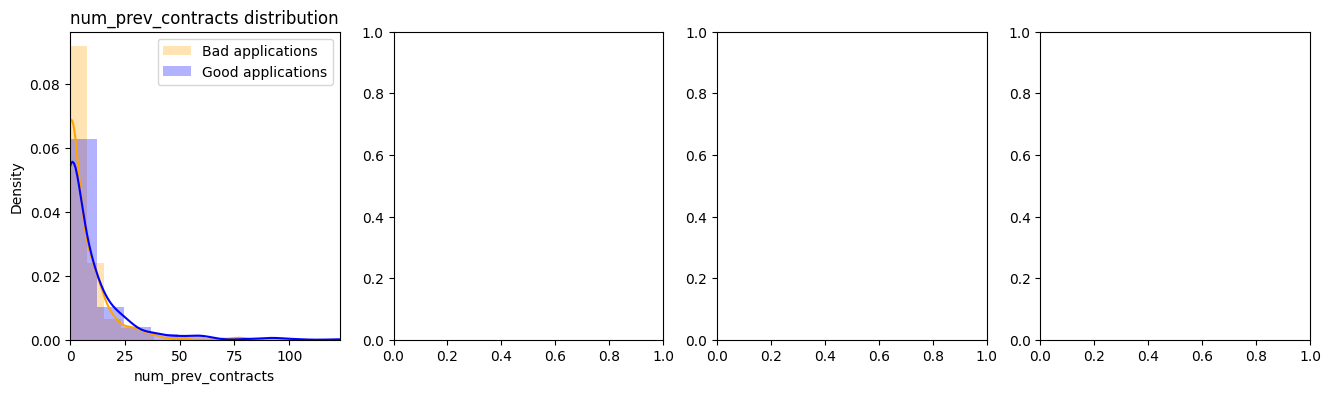

c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

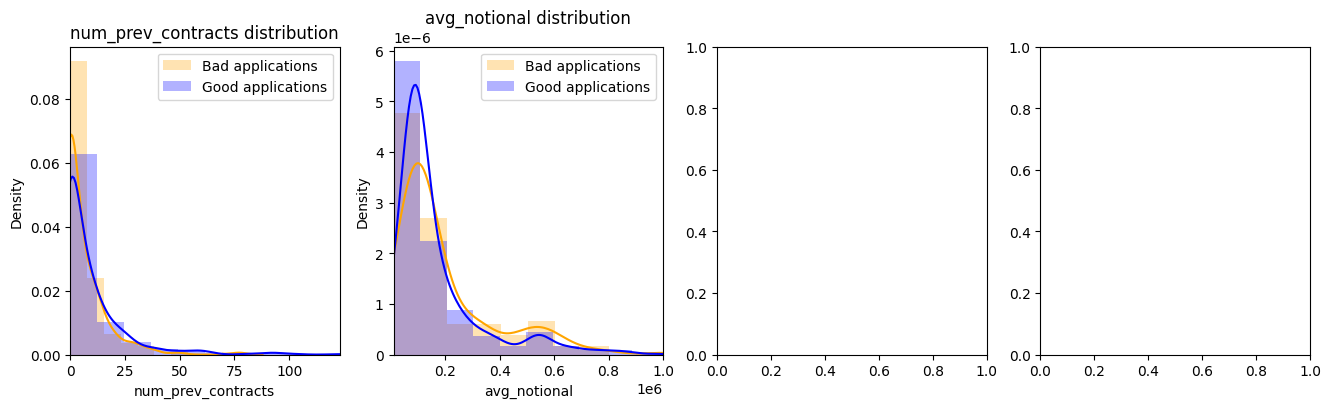

c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

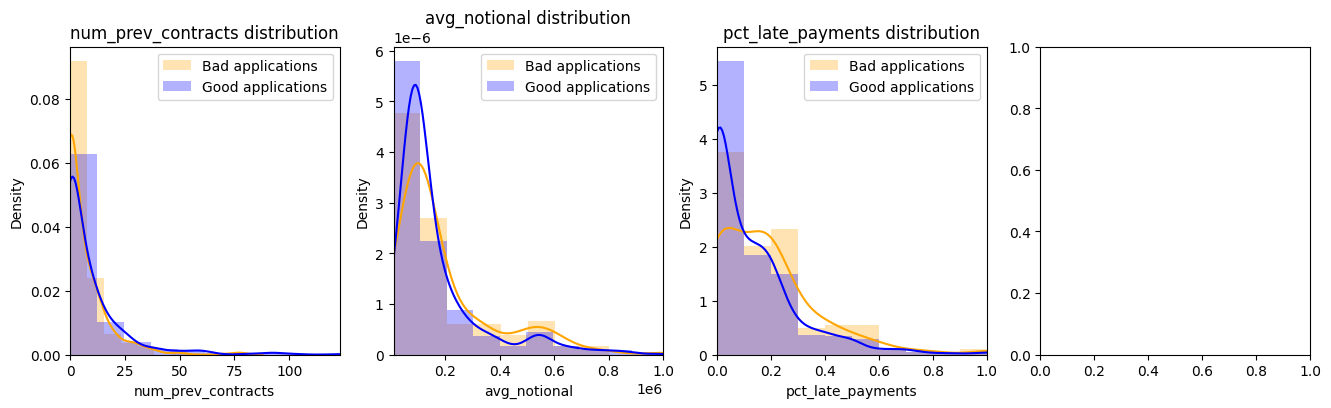

c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

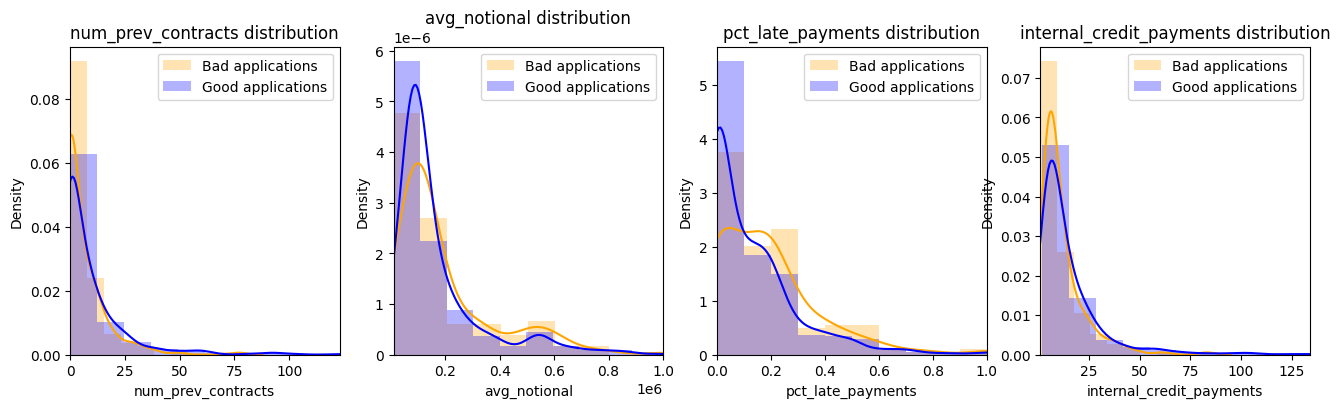

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,len(internal_features.columns), figsize=(16, len(internal_features.columns)))

for i, column in enumerate(internal_features.columns):
    plt.sca(axs[i])  # Establece el eje actual en matplotlib
    plot_comparison(data=internal_info, column=column)

plt.subplots_adjust(hspace=0.5)
plt.show()


### Credit reports

In [17]:
def get_aux_cols_credit_reports(credit_reports_df):
    """Create auxiliar columns from credit reports."""
    # Create new columns related to open and closing_date
    credit_reports_df["is_open_account"] = np.where(credit_reports_df["account_closing_date"].isna(), 1, 0)
    credit_reports_df["is_closed_account"] = np.where(credit_reports_df["account_closing_date"].isna(), 0, 1)
    return None


In [18]:
# Unify categories
def unify_institution(credit_reports_df):
    """Unify categories from a specific credit reports dataframe"""
    credit_reports_df.loc[credit_reports_df['institution'].isin(['FONDOS Y FIDEIC', 'FONDOS Y FIDEICO','FONDOS Y FIDEICOMISOS']), 'institution'] = 'FONDOS Y FIDEICOMISOS'
    credit_reports_df.loc[credit_reports_df['institution'].isin(['ARRENDADORA', 'ARRENDADORAS FINANCIERAS', 'ARRENDADORAS NO FINANCIERAS', 'ARRENDAMIENTO']), 'institution'] = 'ARRENDADORA'
    credit_reports_df.loc[credit_reports_df['institution'].isin(['BANCO', 'BANCOS']), 'institution'] = 'BANCO'
    credit_reports_df.loc[credit_reports_df['institution'].isin(['COMPANIA DE FINANCIAMIENTO AUTOMOTRIZ','COMPANIA DE FINANCIAMIENTO DE MOTOCICLET']), 'institution'] = 'COMPANIA DE FINANCIAMIENTO AUTOMOTRIZ'
    credit_reports_df.loc[credit_reports_df['institution'].isin(['COMPANIA DE FINANCIAMIENTO AUTOMOTRIZ','COMPANIA DE FINANCIAMIENTO DE MOTOCICLET']), 'institution'] = 'COMPANIA DE FINANCIAMIENTO AUTOMOTRIZ'
    credit_reports_df.loc[credit_reports_df['institution'].isin(['GOBIERNO','GUBERNAMENTALES']), 'institution'] = 'GOBIERNO'
    credit_reports_df.loc[credit_reports_df['institution'].isin(['MICROFINANCIERA', 'OTRAS FINANCIERA']), 'institution'] = 'OTRAS FINANCIERA'
    credit_reports_df.loc[credit_reports_df['institution'].isin(['TELEFONIA CELULAR','TELEFONIA LOCAL Y DE LARGA DISTANCIA']), 'institution'] = 'TELEFONIA'
    credit_reports_df.loc[credit_reports_df['institution'].isin(['TIENDA COMERCIAL','TIENDA DE AUTOSERVICIO', 'TIENDA DE ROPA', 'TIENDA DEPARTAMENTAL']), 'institution'] = 'TIENDA'
    return None

# Review categories
clean_credit_reports["institution"].sort_values().unique()

array(['ADMINISTRADORAS DE CARTERA', 'ARRENDADORA',
       'ARRENDADORAS FINANCIERAS', 'ARRENDADORAS NO FINANCIERAS',
       'ARRENDAMIENTO', 'AUTOFINANCIAMIENTO', 'AUTOMOTRIZ', 'BANCO',
       'BANCOS', 'CAJAS DE AHORRO', 'CASA DE EMPENO', 'CIA Q  OTORGA',
       'COBRANZA', 'COMERCIAL', 'COMPANIA DE FINANCIAMIENTO AUTOMOTRIZ',
       'COMPANIA DE FINANCIAMIENTO DE MOTOCICLET',
       'COMPANIA DE PRESTAMO PERSONAL', 'COMUNICACIONES', 'COOPERATIVA',
       'COOPERATIVA DE AHORRO Y CREDITO', 'EDUCACION', 'FACTORAJE',
       'FINANCIERA', 'FONDOS Y FIDEIC', 'FONDOS Y FIDEICO',
       'FONDOS Y FIDEICOMISOS', 'GOBIERNO', 'GUBERNAMENTALES',
       'HIPOTECAGOBIERNO', 'HIPOTECARIA', 'HIPOTECARIO NO BANCARIO',
       'KONFIO', 'MERCANCIA PARA HOGAR Y OFICINA',
       'MERCANCIA PARA LA CONSTRUCCION', 'MIC CREDITO PERS',
       'MICROFINANCIERA', 'OTRAS FINANCIERA',
       'SERVICIO DE TELEVISION DE PAGA', 'SERVICIOS', 'SERVS. GRALES.',
       'SOCIEDAD FINANCIERA DE OBJETO MULTIPLE',
      

In [19]:
# Create features
def get_credit_features(credit_reports_df):
    """Calculate credit report features."""
    # Set dataframe
    EXTERNAL_INPUT = credit_reports_df.copy()

    # Create auxiliar columns
    get_aux_cols_credit_reports(credit_reports_df=EXTERNAL_INPUT)

    # Unify institution categories
    unify_institution(credit_reports_df=EXTERNAL_INPUT)

    # Define categorical features
    columns_to_encode = ["institution", "account_type", "credit_type"]
    original_columns = EXTERNAL_INPUT.columns

    # Get dummy columns
    credit_reports_dummies = pd.get_dummies(EXTERNAL_INPUT, columns=columns_to_encode)
    all_columns = credit_reports_dummies.columns
    dummy_columns = [col for col in all_columns if col not in original_columns]
    # Add application_id
    dummy_columns.append("application_id")

    # Create dummy features
    credit_reports_dummy_features = credit_reports_dummies[dummy_columns].groupby("application_id").agg("sum").astype(bool)
    # Create numerical features
    credit_reports_numerical_features = EXTERNAL_INPUT.groupby("application_id").agg(
        open_accounts=pd.NamedAgg(column="is_open_account", aggfunc="sum"),
        closed_accounts=pd.NamedAgg(column="is_closed_account", aggfunc="sum"),
        max_credit_amount=pd.NamedAgg(column="maximum_credit_amount", aggfunc="max"),
        current_balance = pd.NamedAgg(column="current_balance", aggfunc="sum"),
        past_due_balance = pd.NamedAgg(column="past_due_balance", aggfunc="sum"),
        total_credit_payments = pd.NamedAgg(column="total_credit_payments", aggfunc="sum"),
        worst_delinquency_past_due_balance = pd.NamedAgg(column="worst_delinquency_past_due_balance", aggfunc="max"),
        credit_limit = pd.NamedAgg(column="credit_limit", aggfunc="sum")
    )

    # Create derived features
    credit_reports_numerical_features["past_due_ratio"] = credit_reports_numerical_features["past_due_balance"].div(credit_reports_numerical_features["credit_limit"])
    credit_reports_numerical_features["current_balance_ratio"] = credit_reports_numerical_features["current_balance"].div(credit_reports_numerical_features["credit_limit"])
    return credit_reports_numerical_features.merge(credit_reports_dummy_features, how="left", on="application_id")


In [20]:
# Get credit report features
credit_report_features = get_credit_features(credit_reports_df=clean_credit_reports)

In [21]:
credit_report_features.describe()

,open_accounts,closed_accounts,max_credit_amount,current_balance,past_due_balance,total_credit_payments,worst_delinquency_past_due_balance,credit_limit,past_due_ratio,current_balance_ratio
count,921.000000,921.000000,9.210000e+02,9.210000e+02,921.000000,921.000000,921.000000,9.210000e+02,921.000000,921.000000
mean,10.537459,15.137894,4.848281e+05,7.897580e+05,6143.836048,618.563518,4373.407166,1.255601e+06,0.012499,0.757210
std,5.954443,18.396227,6.407955e+05,1.102643e+06,29542.562775,790.819399,10303.248722,1.817979e+06,0.055283,0.729340
min,0.000000,0.000000,7.892000e+03,0.000000e+00,0.000000,0.000000,0.000000,3.696000e+03,0.000000,0.000000
25%,6.000000,5.000000,1.500000e+05,1.764840e+05,0.000000,143.000000,0.000000,3.286800e+05,0.000000,0.395512
50%,10.000000,10.000000,2.855000e+05,4.298700e+05,0.000000,377.000000,1046.000000,7.109640e+05,0.000000,0.607665
75%,13.000000,19.000000,5.300000e+05,8.876760e+05,1047.000000,786.000000,4178.000000,1.416254e+06,0.001389,0.846216
max,46.000000,189.000000,5.100000e+06,9.781258e+06,494494.000000,7988.000000,154402.000000,2.192811e+07,0.818363,7.619477


### External features

In [22]:
############### External features ###############
external_features.describe()

,application_id,DEFAULTED_ACCOUNTS_3M_OVER_12M_INCLUSIVE,DEFAULTED_ACCOUNTS_3M_OVER_12M_EXCLUSIVE
count,921.000000,498.000000,497.000000
mean,929.928339,0.947711,1.016511
std,555.317811,0.851456,1.160751
min,1.000000,0.000000,0.000000
25%,419.000000,0.000000,0.000000
50%,960.000000,1.000000,1.000000
75%,1436.000000,1.421429,1.500000
max,1790.000000,4.000000,10.000000


In [23]:
external_info = general_info.merge(external_features, how="left", on="application_id")
external_info

,application_id,application_date,documentation_date,user_id,documentation_date_new,target,limit_date,DEFAULTED_ACCOUNTS_3M_OVER_12M_INCLUSIVE,DEFAULTED_ACCOUNTS_3M_OVER_12M_EXCLUSIVE
0,1383,2021-06-27 03:51:05,2021-07-02 12:03:01,1375.0,2022-03-29 13:50:13,0.0,2022-03-27 01:55:21,0.000,0.000000
1,1650,2021-11-26 08:21:07,2021-11-29 14:23:49,1808.0,2022-04-08 13:44:00,0.0,2022-04-06 12:59:00,1.200,2.000000
2,940,2020-12-15 09:06:14,2020-12-16 20:52:28,1423.0,2021-09-28 11:50:00,0.0,2021-09-26 03:58:53,1.000,1.000000
3,64,2019-01-29 00:00:00,2019-01-30 15:49:31,1063.0,2020-01-02 10:57:19,0.0,2019-12-31 00:00:00,0.800,0.666667
4,1691,2022-01-03 16:16:54,2022-01-06 18:56:10,1829.0,2022-06-29 09:16:22,0.0,2022-06-27 13:25:08,NaN,NaN
...,...,...,...,...,...,...,...,...,...
916,1537,2021-09-26 05:02:54,2021-09-27 19:17:29,1160.0,2022-02-08 13:06:44,1.0,2022-02-06 05:24:59,0.000,0.000000
917,60,2019-01-23 00:00:00,2019-01-23 16:02:58,1059.0,2019-12-18 11:20:54,1.0,2019-12-17 00:00:00,0.000,0.000000
918,6,2018-09-18 00:00:00,2018-09-19 15:35:59,1005.0,2020-02-21 09:59:56,1.0,2020-02-19 00:00:00,1.125,1.250000
919,874,2020-11-22 15:03:01,2020-11-23 20:06:12,1515.0,2021-06-03 19:38:58,1.0,2021-05-30 05:28:40,NaN,NaN


c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

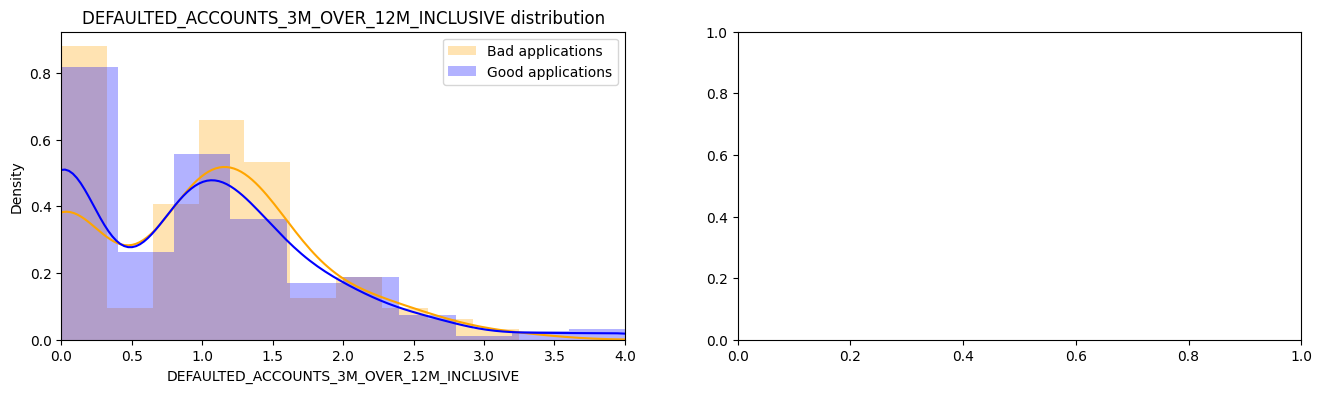

c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AldoErnestoEscobedoT\anaconda3\envs\snow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

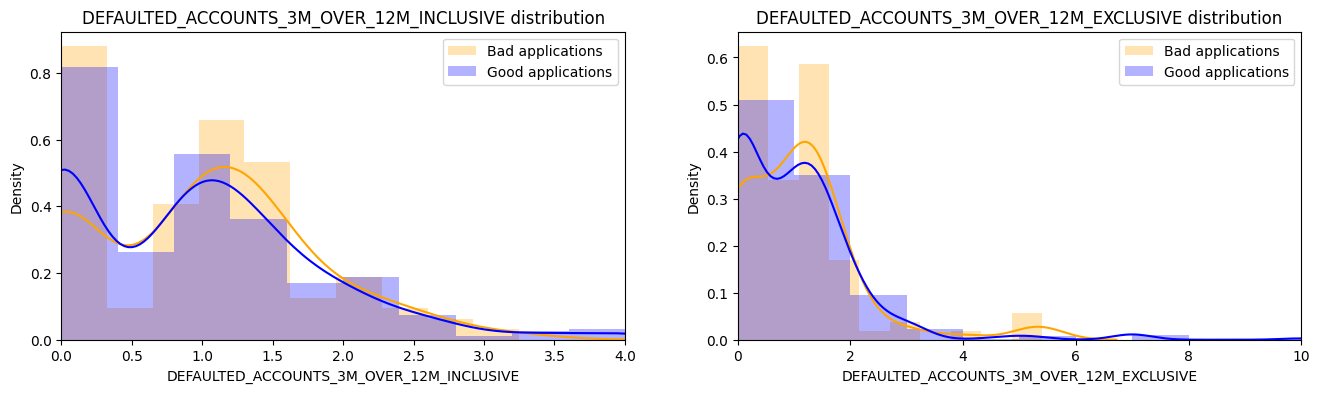

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(16, 4))

for i, column in enumerate(["DEFAULTED_ACCOUNTS_3M_OVER_12M_INCLUSIVE", "DEFAULTED_ACCOUNTS_3M_OVER_12M_EXCLUSIVE"]):
    plt.sca(axs[i])  # Establece el eje actual en matplotlib
    plot_comparison(data=external_info, column=column)

plt.subplots_adjust(hspace=0.5)
plt.show()

### Merge all features

In [25]:
def get_features(general_info_df, internal_payments, credit_reports, external_features):
    """Get and merge all features related to applications in general_info_df dataframe"""
    # Input
    GENERAL_INFO = general_info_df.copy()

    # Get internal features
    internal_features = get_internal_features(internal_payments_df=internal_payments)
    GENERAL_INFO = GENERAL_INFO.merge(internal_features, how="left", on="application_id")

    # Get credit report features
    credit_report_features = get_credit_features(credit_reports_df=credit_reports)
    GENERAL_INFO = GENERAL_INFO.merge(credit_report_features, how="left", on="application_id")

    return GENERAL_INFO

In [27]:
get_features(general_info[["application_id", "target"]], clean_internal_payments, clean_credit_reports, external_features).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   application_id                                      921 non-null    int64  
 1   target                                              921 non-null    float64
 2   num_prev_contracts                                  921 non-null    int32  
 3   avg_notional                                        921 non-null    float64
 4   pct_late_payments                                   921 non-null    float64
 5   internal_credit_payments                            921 non-null    int64  
 6   open_accounts                                       921 non-null    int32  
 7   closed_accounts                                     921 non-null    int32  
 8   max_credit_amount                                   921 non-null    float64
 9  

## Tests

In [31]:
credit_reports.groupby("institution").agg("count").sort_values(by="application_id")

,application_id,account_type,credit_type,total_credit_payments,payment_frequency,amount_to_pay_next_payment,account_opening_date,account_closing_date,maximum_credit_amount,current_balance,credit_limit,past_due_balance,payment_history,worst_delinquency_date,worst_delinquency_past_due_balance,report_date,limit_date
institution,,,,,,,,,,,,,,,,,
SOFOL EMPRESARIAL,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
CASA DE EMPENO,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
SOFOL HIPOTECARIA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
VENTA POR CORREO / TELEFONO,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
EDUCACION,3,3,3,2,3,3,3,1,3,3,3,3,3,0,3,3,3
FONDOS Y FIDEICO,3,3,3,3,3,3,3,2,3,3,3,3,3,0,3,3,3
ARRENDADORAS NO FINANCIERAS,3,3,3,3,3,3,3,1,3,3,3,3,3,0,3,3,3
HIPOTECARIA,4,4,4,4,4,4,4,3,4,4,4,4,4,0,4,4,4
ARRENDADORAS FINANCIERAS,5,5,5,5,5,5,5,1,5,5,5,5,5,2,5,5,5


In [16]:
# Create dummy features
columns_to_encode = ["institution", "account_type", "credit_type"]

new_input_encoded = pd.get_dummies(clean_credit_reports.query("application_id==44"), columns=columns_to_encode).groupby("application_id").agg(sum)
new_input_encoded

C:\Users\AldoErnestoEscobedoT\AppData\Local\Temp\ipykernel_28084\1050468278.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  new_input_encoded = pd.get_dummies(credit_reports.query("application_id==44"), columns=columns_to_encode).groupby("application_id").agg(sum)


,total_credit_payments,payment_frequency,amount_to_pay_next_payment,account_opening_date,account_closing_date,maximum_credit_amount,current_balance,credit_limit,past_due_balance,payment_history,...,institution_TIENDA COMERCIAL,account_type_Pagos Fijos,account_type_Revolvente,account_type_Sin Límite Preestablecido,credit_type_Compra de Automóvil,credit_type_Física Actividad Empresarial,credit_type_Línea de Crédito,credit_type_Otros (Múltiples Créditos),credit_type_Préstamo Personal,credit_type_Tarjeta de Crédito
application_id,,,,,,,,,,,,,,,,,,,,,
44,116.0,MMMMMMMMMMMQMMM,64111.0,2012-02-012012-07-152013-02-152013-06-142013-0...,2016-02-292015-04-302018-11-302018-01-312018-0...,1622912.0,1088649,761900.0,0,V V V V V V V V V V V V V V V V V V V-- V V V...,...,2,3,7,5,2,1,3,1,1,7


In [17]:
train_columns = pd.get_dummies(credit_reports, columns=columns_to_encode).columns
train_columns

Index(['application_id', 'total_credit_payments', 'payment_frequency',
       'amount_to_pay_next_payment', 'account_opening_date',
       'account_closing_date', 'maximum_credit_amount', 'current_balance',
       'credit_limit', 'past_due_balance',
       ...
       'credit_type_Otros (Múltiples Créditos)',
       'credit_type_Préstamo de Nomina', 'credit_type_Préstamo Empresarial',
       'credit_type_Préstamo Garantizado', 'credit_type_Préstamo Personal ',
       'credit_type_Préstamo Quirografiario',
       'credit_type_Préstamo no garantizado',
       'credit_type_Préstamo para estudiante',
       'credit_type_Tarjeta Departamental', 'credit_type_Tarjeta de Crédito'],
      dtype='object', length=107)

In [18]:
# Aseguramos que el nuevo input tenga las mismas columnas que los datos de entrenamiento
# Las columnas faltantes se llenarán con ceros
new_input_encoded = new_input_encoded.reindex(columns=train_columns, fill_value=0)

In [19]:
new_input_encoded

,application_id,total_credit_payments,payment_frequency,amount_to_pay_next_payment,account_opening_date,account_closing_date,maximum_credit_amount,current_balance,credit_limit,past_due_balance,...,credit_type_Otros (Múltiples Créditos),credit_type_Préstamo de Nomina,credit_type_Préstamo Empresarial,credit_type_Préstamo Garantizado,credit_type_Préstamo Personal,credit_type_Préstamo Quirografiario,credit_type_Préstamo no garantizado,credit_type_Préstamo para estudiante,credit_type_Tarjeta Departamental,credit_type_Tarjeta de Crédito
application_id,,,,,,,,,,,,,,,,,,,,,
44,0,116.0,MMMMMMMMMMMQMMM,64111.0,2012-02-012012-07-152013-02-152013-06-142013-0...,2016-02-292015-04-302018-11-302018-01-312018-0...,1622912.0,1088649,761900.0,0,...,1,0,0,0,1,0,0,0,0,7


In [8]:
# Auxiliar function
def column_to_datetime_from_df(df, column_name):
    """Convert column to datetime from dataframe."""
    df[column_name] = pd.to_datetime(df[column_name])
    return None